In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# For 3d plots. This import is necessary to have 3D plotting below
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import csv

# For statistics. Requires statsmodels 5.0 or more
import statsmodels.formula.api as smf
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

Read in the results as a dataframe
change to z

In [2]:
df4 = pd.read_csv('txdot_results_SET4.csv')
df5 = pd.read_csv('txdot_results_SET5.csv')
df6 = pd.read_csv('txdot_results_SET6.csv')


In [3]:
df4.columns


Index(['Model', 'TandemMoment_df', 'eg', 'minendmoment', 'LR1', 'minXreaction',
       'HS20Moment_df', 'Iy1', 'St1', 'St2', 'Iy2', 'I', 'numberofgirders',
       'maxZreaction', 'span', 'width', 'LR2', 'maxendmoment', 'minZreaction',
       'A', 'Sb2', 'HS20Moment', 'Kg', 'numberofdiaphragms', 'df',
       'maxXreaction', 'ybar2', 'Y', 'maxmoment', 'ybar1', 'girders', 'Sb1',
       'mindeflection', 'girderspacing', 'df1', 'df2', 'haunch',
       'TandemMoment'],
      dtype='object')

Make some new columns

In [4]:
if True:
    df4['AR'] = df4['span']/df4['width']
    df4['RA'] = df4['width']/df4['span']
    df4['AR1_2'] = (df4['span']/df4['width'])**0.5
    df4['RX_RZ'] = df4['maxXreaction']/df4['maxZreaction']
    df4['PEM'] = -df4['minendmoment']/df4['maxmoment']
    df4['AE'] = df4['A']*df4['eg']
    df4['span2'] = df4['span']**2
    df4['PR'] = df4.Model.str[-3]
    df4['egY'] = df4['eg']/df4['Y']
    df4['YL'] = df4['Y']/df4['span']
    

if True:
    df5['AR'] = df5['span']/df5['width']
    df5['RA'] = df5['width']/df5['span']
    df5['AR1_2'] = (df5['span']/df5['width'])**0.5
    df5['RX_RZ'] = df5['maxXreaction']/df5['maxZreaction']
    df5['PEM'] = -df5['minendmoment']/df5['maxmoment']
    df5['AE'] = df5['A']*df5['eg']
    df5['span2'] = df5['span']**2
    df5['PR'] = df5.Model.str[-3]
    df5['egY'] = df5['eg']/df5['Y']
    df5['YL'] = df5['Y']/df5['span']

if True:
    df6['AR'] = df6['span']/df6['width']
    df6['RA'] = df6['width']/df6['span']
    df6['AR1_2'] = (df6['span']/df6['width'])**0.5
    df6['RX_RZ'] = df6['maxXreaction']/df6['maxZreaction']
    df6['PEM'] = -df6['minendmoment']/df6['maxmoment']
    df6['AE'] = df6['A']*df6['eg']
    df6['span2'] = df6['span']**2
    df6['PR'] = df6.Model.str[-3]
    df6['egY'] = df6['eg']/df6['Y']
    df6['YL'] = df6['Y']/df6['span']
    

# PE Moments - free bearings

Text(0, 0.5, 'End Moment / Midspan Moment')

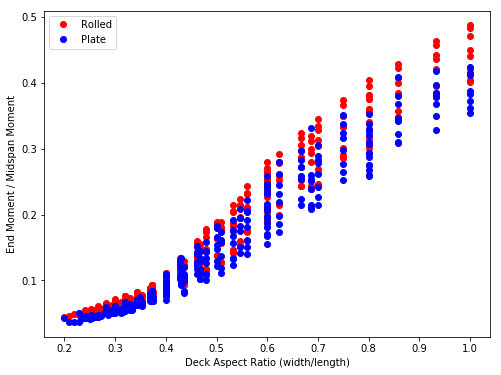

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(df4[df4.PR=="R"]['RA']), list(df4[df4.PR=="R"]['PEM']), 'ro', label="Rolled")
ax.plot(list(df4[df4.PR=="P"]['RA']), list(df4[df4.PR=="P"]['PEM']), 'bo', label="Plate")
ax.legend(loc='best');
ax.set_xlabel('Deck Aspect Ratio (width/length)')
ax.set_ylabel('End Moment / Midspan Moment')


Plot the PEM as a function of Aspect Ratio and something else.

In [6]:
x1=list(df4[df4.PR!="X"]['RA'])
y1=list(df4[df4.PR!="X"]['Y'])
z1=list(df4[df4.PR!="X"]['PEM'])
text1 = list(df4[df4.PR!="X"]['Model'])
trace1 = go.Scatter3d(
    x=x1,
    y=y1,
    z=z1,
    text = text1,
    mode='markers',
    hoverinfo='all',
    marker=dict(
        size=5,
        color=z1,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
)
data = [trace1]
layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                        title='Deck Length/Width'),
                    yaxis = dict(
                        title='Y'),
                    zaxis = dict(
                        title='END MOMENT / MAX MOMENT'),),
                    width=700,
                    margin=dict(
                    r=20, b=10,
                    l=10, t=10)
                  )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [8]:
x1=list(df4[df4.PR=="R"]['RA'])
y1=list(df4[df4.PR=="R"]['Y'])
z1=list(df4[df4.PR=="R"]['PEM'])
text1 = list(df4[df4.PR=="R"]['Model'])
trace1 = go.Scatter3d(
    name="Rolled",
    x=x1,
    y=y1,
    z=z1,
    text = text1,
    mode='markers',
    hoverinfo='all',
    marker=dict(
        size=5,
        color = 'rgb(255,0,0)',
        opacity = 1.0
        #color=z,                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        #opacity=0.75
    )
)



x2=list(df4[df4.PR=="P"]['RA'])
y2=list(df4[df4.PR=="P"]['Y'])
z2=list(df4[df4.PR=="P"]['PEM'])
text2 = list(df4[df4.PR=="P"]['Model'])
trace2 = go.Scatter3d(
    name="Plate",
    x=x2,
    y=y2,
    z=z2,
    text = text2,
    mode='markers',
    hoverinfo='all',
    marker=dict(
        size=5,
        color = 'rgb(0,0,255)',
        opacity = 1.0
        #color=z,                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        #opacity=0.75
    )
)



data = [trace1,trace2]
layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                        title='Deck Length/Width'),
                    yaxis = dict(
                        title='Y'),
                    zaxis = dict(
                        title='END MOMENT / MAX MOMENT'),),
                    width=700,
                    margin=dict(
                    r=20, b=10,
                    l=10, t=10)
                  )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Find best fit coefficients using ordinary least squares (OLS)
Module documentation here:
https://www.statsmodels.org/stable/index.html


In [9]:
model = smf.ols("PEM ~ RA + Y", data=df4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PEM   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     9127.
Date:                Wed, 05 Jun 2019   Prob (F-statistic):               0.00
Time:                        12:15:22   Log-Likelihood:                 1475.6
No. Observations:                 588   AIC:                            -2945.
Df Residuals:                     585   BIC:                            -2932.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2715      0.007    -36.550      0.000      -0.286      -0.257
RA             0.5833      0.004    130.933      0.000       0.575       0.592
Y              0.0034      0.000     22.893      0.000       0.003       0.004
==============================================================================
Omnibus:                        2.043   Durbin-Watson:                   0.751
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                2.041
Skew:                           0.021   Prob(JB):                        0.360
Kurtosis:                       3.286   Cond. No.                         415.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Take these coefficients and plot the plane

In [10]:
print(model.rsquared)
a = model._results.params[0]
b = model._results.params[1]
c = model._results.params[2]
#dir(model)
df4['tst'] = a + df4['RA'] * b + df4['Y'] * c

0.9689460029744964


In [11]:

x=[]
for i in range(13):
    x.append(float(i/10.))
y=[]
for i in range(25,50):
    y.append(float(i))

tst = []
for yy in y:
    tsty=[]
    for xx in x:
        tsty.append(float(a + xx*b + yy*c))
    tst.append(tsty)
#print(len(x), min(x), max(x))
#print(len(y), min(y), max(y))
#print(len(tst), min(tst), max(tst))
trace2 = go.Surface(x=x,y=y,z=tst,opacity = 1.0,showscale=False,colorscale=[[0, 'rgba(100,100,100,0.5)'], [1, 'rgb(100,100,100)']])
#layout = go.Layout(autosize=True)
layout = go.Layout(autosize=True,
                    scene = dict(
                    xaxis = dict(
                        title='Deck Width/Length'),
                    yaxis = dict(
                        title='Girder + Deck Depth (in)'),
                    zaxis = dict(
                        title='End Moment / Midspan Moment'),),
                    width=700,
                    margin=dict(
                    r=20, b=10,
                    l=10, t=10)
                  )




x=list(df4['RA'])
y=list(df4['Y'])
z=list(df4['PEM'])
err = list(df4['tst'] - df4['RX_RZ'])

text = list(df4['Model'])
trace3 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    text = text,
    mode='markers',
    hoverinfo='all',
    marker=dict(
        size=5,
        color=err,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1.0
    )
)


fig = go.Figure(data=[trace2,trace3],layout=layout)
py.iplot(fig)                                  

In [12]:
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

                            OLS Regression Results                            
Dep. Variable:                    PEM   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     9367.
Date:                Wed, 05 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:49:02   Log-Likelihood:                 1287.6
No. Observations:                 588   AIC:                            -2571.
Df Residuals:                     586   BIC:                            -2562.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1092      0.003    -35.772      0.0

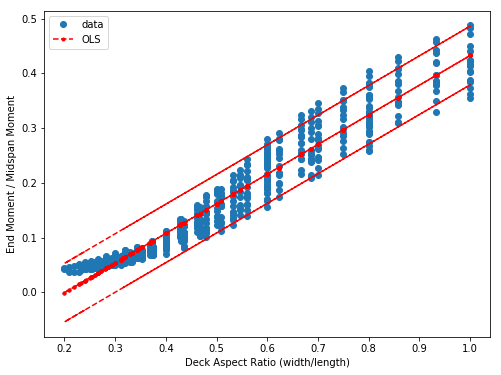

In [28]:
model = smf.ols("PEM ~ RA", data=df4).fit()
prstd, iv_l, iv_u = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(list(df4['RA']), list(df4['PEM']), 'o', label="data")
#ax.plot(x, y_true, 'b-', label="True")
ax.plot(list(df4['RA']), model.fittedvalues, 'r--.', label="OLS")
ax.plot(list(df4['RA']), iv_u, 'r--')
ax.plot(list(df4['RA']), iv_l, 'r--')
ax.legend(loc='best');
ax.set_xlabel('Deck Aspect Ratio (width/length)')
ax.set_ylabel('End Moment / Midspan Moment')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PEM   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     4702.
Date:                Wed, 05 Jun 2019   Prob (F-statistic):          4.17e-282
Time:                        13:49:06   Log-Likelihood:                 1155.5
No. Observations:                 588   AIC:                            -2307.
Df Residuals:                     586   BIC:                            -2298.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0708      0.004    -18.519      0.0

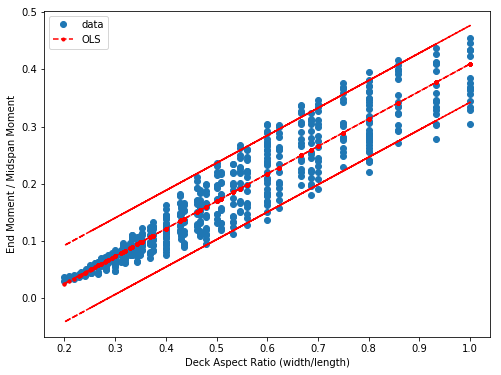

In [29]:
model2 = smf.ols("PEM ~ RA", data=df5).fit()
prstd, iv_l, iv_u = wls_prediction_std(model2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(list(df5['RA']), list(df5['PEM']), 'o', label="data")
#ax.plot(x, y_true, 'b-', label="True")
ax.plot(list(df5['RA']), model2.fittedvalues, 'r--.', label="OLS")
ax.plot(list(df5['RA']), iv_u, 'r--')
ax.plot(list(df5['RA']), iv_l, 'r--')
ax.legend(loc='best');
ax.set_xlabel('Deck Aspect Ratio (width/length)')
ax.set_ylabel('End Moment / Midspan Moment')
print(model2.summary())

Text(0, 0.5, 'End Moment / Midspan Moment')

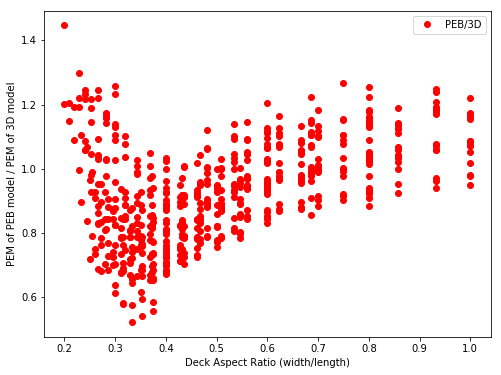

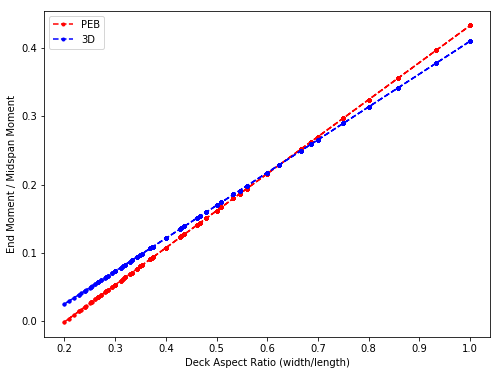

In [34]:
#Compare PEB and 3D models

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(df4['RA']), list(df4['PEM']/df5['PEM']), 'ro', label="PEB/3D")
ax.legend(loc='best');
ax.set_xlabel('Deck Aspect Ratio (width/length)')
ax.set_ylabel('PEM of PEB model / PEM of 3D model')

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(df4['RA']), model.fittedvalues, 'r--.', label="PEB")
ax.plot(list(df5['RA']), model2.fittedvalues, 'b--.', label="3D")
ax.legend(loc='best');
ax.set_xlabel('Deck Aspect Ratio (width/length)')
ax.set_ylabel('End Moment / Midspan Moment')

# PE Reactions - free bearings

In [18]:
#compute "braking force"

#Per LRFD 3.6.4 - 25% of axle weights of design truck, with multiple presence factors.

#use MPF of 1.2 (assuming 1 lane) * 0.25 * vertical reaction


df4['BrakingForce']= df4['maxZreaction']*1.2*0.25
df5['BrakingForce']= df5['maxZreaction']*1.2*0.25
df6['BrakingForce']= df6['maxZreaction']*1.2*0.25


df4['R_B'] = df4['maxXreaction']/df4['BrakingForce']
df5['R_B'] = df5['maxXreaction']/df5['BrakingForce']
df6['R_B'] = df6['maxXreaction']/df6['BrakingForce']

print(df4['R_B'].max())
print(df5['R_B'].max())
print(df6['R_B'].max())

3.3635378768381226
2.863159987138529
8.463499011426977


Text(0, 0.5, 'Pinned End Reaction / Design Braking Force')

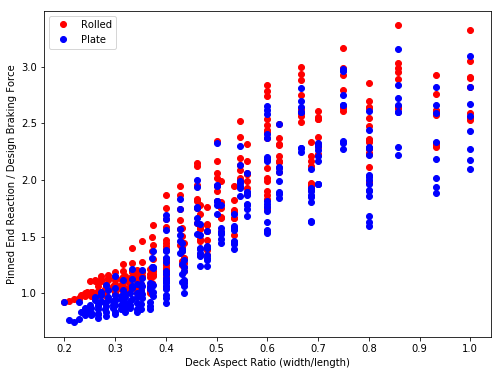

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(df4[df4.PR=="R"]['RA']), list(df4[df4.PR=="R"]['R_B']), 'ro', label="Rolled")
ax.plot(list(df4[df4.PR=="P"]['RA']), list(df4[df4.PR=="P"]['R_B']), 'bo', label="Plate")
ax.legend(loc='best');
ax.set_xlabel('Deck Aspect Ratio (width/length)')
ax.set_ylabel('Pinned End Reaction / Design Braking Force')

Compare PEB and 3D models.

Text(0, 0.5, 'Pinned End Reaction / Design Braking Force')

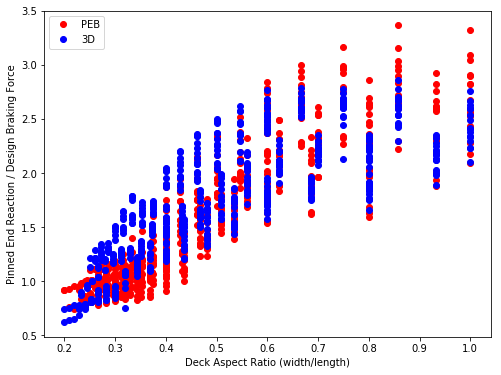

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(df4['RA']), list(df4['R_B']), 'ro', label="PEB")
ax.plot(list(df5['RA']), list(df5['R_B']), 'bo', label="3D")
ax.legend(loc='best');
ax.set_xlabel('Deck Aspect Ratio (width/length)')
ax.set_ylabel('Pinned End Reaction / Design Braking Force')

In [14]:
x=list(df4[df4.PEM>0.1]['RA'])
y=list(df4[df4.PEM>0.1]['Y'])
z=list(df4[df4.PEM>0.1]['RX_RZ'])
text = list(df4[df4.PEM>0.1]['Model'])
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    text = text,
    mode='markers',
    hoverinfo='all',
    marker=dict(
        size=5,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1.0
    )
)
data = [trace1]
layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                        title='Deck Length/Width'),
                    yaxis = dict(
                        title='Girder + Deck Depth (in)'),
                    zaxis = dict(
                        title='RX / RZ'),),
                    width=700,
                    margin=dict(
                    r=20, b=10,
                    l=10, t=10)
                  )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [101]:
#ordinate least squares fit
model = smf.ols("RX_RZ2 ~ RA + Y", data=df4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RX_RZ2   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     925.4
Date:                Wed, 15 May 2019   Prob (F-statistic):          6.32e-182
Time:                        13:09:30   Log-Likelihood:                 512.10
No. Observations:                 588   AIC:                            -1018.
Df Residuals:                     585   BIC:                            -1005.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1038      0.038      2.715      0.007       0.029       0.179
RA             0.8169      0.023     35.623      0.000       0.772       0.862
Y             -0.0058      0.001     -7.524      0.000      -0.007      -0.004
==============================================================================
Omnibus:                       64.905   Durbin-Watson:                   0.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.344
Skew:                           0.709   Prob(JB):                     1.09e-24
Kurtosis:                       4.579   Cond. No.                         415.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

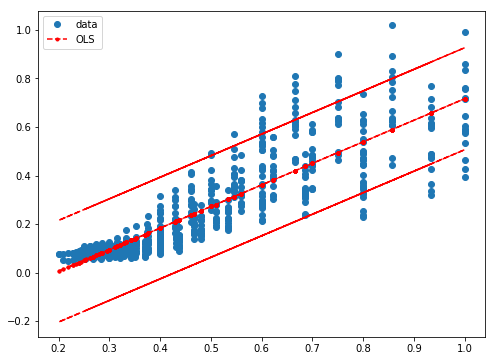

In [104]:
prstd, iv_l, iv_u = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(list(df4['RA']), list(df4['RX_RZ2']), 'o', label="data")
#ax.plot(x, y_true, 'b-', label="True")
ax.plot(list(df4['RA']), model.fittedvalues, 'r--.', label="OLS")
ax.plot(list(df4['RA']), iv_u, 'r--')
ax.plot(list(df4['RA']), iv_l, 'r--')
ax.legend(loc='best');

In [99]:
df4['RX_RZ2'] = df4['RX_RZ']**2
df4['AR2'] = df4['AR']**2


In [100]:
x=list(df4['RA'])
y=list(df4['Y'])
z=list(df4['RX_RZ'])
text = list(df4['Model'])
trace4 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    text = text,
    mode='markers',
    hoverinfo='all',
    marker=dict(
        size=5,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1.0
    )
)
data = [trace4]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [103]:
model = smf.ols("RX_RZ2 ~ RA", data=df4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RX_RZ2   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1639.
Date:                Wed, 15 May 2019   Prob (F-statistic):          6.73e-172
Time:                        13:09:30   Log-Likelihood:                 484.94
No. Observations:                 588   AIC:                            -965.9
Df Residuals:                     586   BIC:                            -957.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1708      0.012    -14.283      0.000      -0.194      -0.147
RA             0.8872      0.022     40.481      0.000       0.844       0.930
==============================================================================
Omnibus:                       76.633   Durbin-Watson:                   0.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.208
Skew:                           0.697   Prob(JB):                     4.48e-40
Kurtosis:                       5.335   Cond. No.                         6.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'PER of PEB model / PER of 3D model')

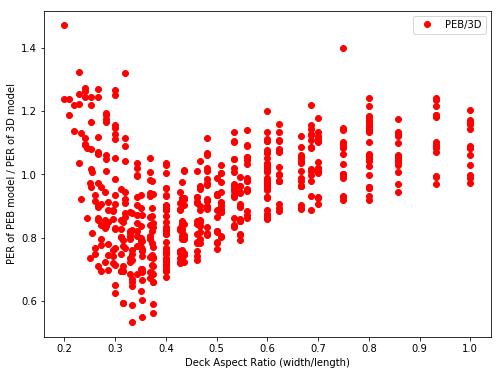

In [36]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(df4['RA']), list(df4['RX_RZ']/df5['RX_RZ']), 'ro', label="PEB/3D")
ax.legend(loc='best');
ax.set_xlabel('Deck Aspect Ratio (width/length)')
ax.set_ylabel('PER of PEB model / PER of 3D model')



# PE Moments - guided bearings

                            OLS Regression Results                            
Dep. Variable:                    PEM   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     17.05
Date:                Wed, 15 May 2019   Prob (F-statistic):           4.17e-05
Time:                        15:46:57   Log-Likelihood:                 949.09
No. Observations:                 588   AIC:                            -1894.
Df Residuals:                     586   BIC:                            -1885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4058      0.005     74.745      0.0

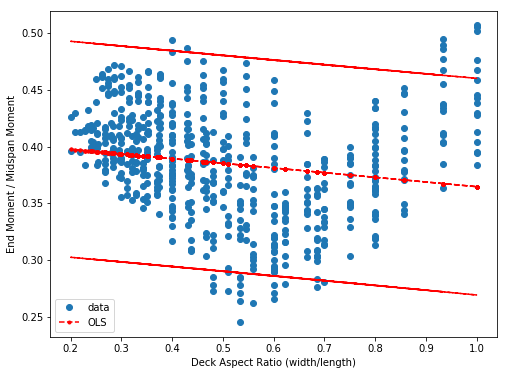

In [119]:
model = smf.ols("PEM ~ RA", data=df6).fit()
prstd, iv_l, iv_u = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(list(df6['RA']), list(df6['PEM']), 'o', label="data")
#ax.plot(x, y_true, 'b-', label="True")
ax.plot(list(df6['RA']), model.fittedvalues, 'r--.', label="OLS")
ax.plot(list(df6['RA']), iv_u, 'r--')
ax.plot(list(df6['RA']), iv_l, 'r--')
ax.legend(loc='best');
ax.set_xlabel('Deck Aspect Ratio (width/length)')
ax.set_ylabel('End Moment / Midspan Moment')
print(model.summary())

Repeat for ratio of longitudinal reactions

In [102]:
a = model._results.params[0]
b = model._results.params[1]
c = model._results.params[2]
#dir(model)
df4['tst2'] = a + df4['RA'] * b + df4['Y'] * c


x=[]
for i in range(13):
    x.append(float(i/10.))
y=[]
for i in range(25,50):
    y.append(float(i))

tst = []
for yy in y:
    tsty=[]
    for xx in x:
        tsty.append(float(a + xx*b + yy*c))
    tst.append(tsty)
#print(len(x), min(x), max(x))
#print(len(y), min(y), max(y))
#print(len(tst), min(tst), max(tst))
trace5 = go.Surface(x=x,y=y,z=tst,opacity = 1.0,showscale=False,colorscale=[[0, 'rgb(100,100,100)'], [1, 'rgb(100,100,100)']])
layout = go.Layout(autosize=True)





x=list(df4['RA'])
y=list(df4['Y'])
z=list(df4['RX_RZ2'])
err = list(df4['tst2'] - df4['RX_RZ2'])

text = list(df4['Model'])
trace6 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    text = text,
    mode='markers',
    hoverinfo='all',
    marker=dict(
        size=5,
        color=err,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1.0
    )
)


fig = go.Figure(data=[trace5,trace6],layout=layout)
py.iplot(fig) 

# PE Reactions - Guided Bearings

Text(0, 0.5, 'Pinned End Reaction / Design Braking Force')

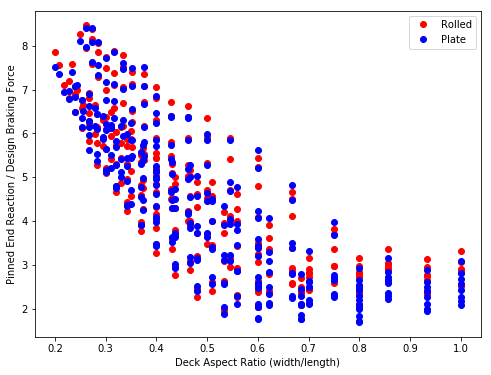

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(df6[df4.PR=="R"]['RA']), list(df6[df6.PR=="R"]['R_B']), 'ro', label="Rolled")
ax.plot(list(df6[df4.PR=="P"]['RA']), list(df6[df6.PR=="P"]['R_B']), 'bo', label="Plate")
ax.legend(loc='best');
ax.set_xlabel('Deck Aspect Ratio (width/length)')
ax.set_ylabel('Pinned End Reaction / Design Braking Force')